In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fftfreq, fft

In [2]:
def get_spectrum(time: np.ndarray, data: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    assert len(time) == len(data)
    N = len(time) + 1
    sampling_rate = (time[-1] - time[0]) / N
    print(sampling_rate)
    freqs = fftfreq(N, sampling_rate)[:N//2]
    spectrum = 2.0 / N * np.abs(fft(data)[:N//2])
    spectrum[0] = 0.0
    return freqs, spectrum

In [3]:
samplerate, data = wavfile.read('E-string.wav')

In [4]:
N = len(data)
times = np.linspace(0., N / samplerate, N)

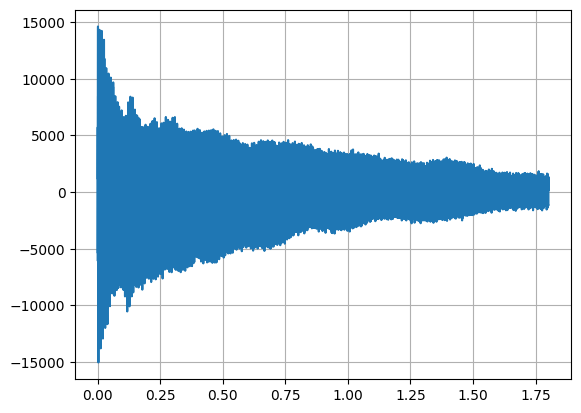

In [5]:
plt.plot(times, data)
plt.grid()

In [6]:
freqs_string, spectrum_string = get_spectrum(times, data)

2.2675451692584342e-05


In [8]:
main_freq_string = freqs_string[np.argmax(spectrum_string)]

In [14]:
print(f'the frequency of E4 string is {main_freq_string:.2f} Hz\nthe true value is 329.63 Hz')

the frequency of E4 string is 331.77 Hz
the true value is 329.63 Hz


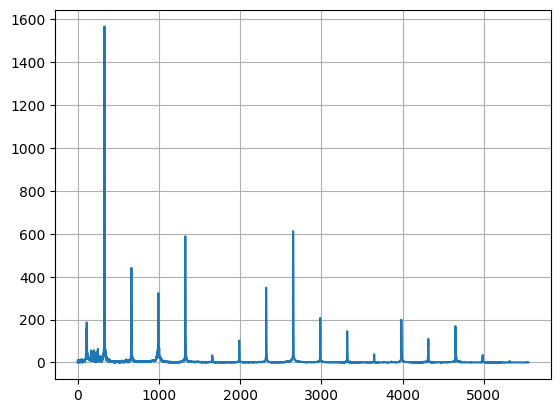

In [15]:
plt.plot(freqs_string[:10000], spectrum_string[:10000])
plt.grid()